In [1]:
### ARQUIVO FINALIZADO ###

In [2]:
### ROTINA DE TRABALHO: ###

# *Cada arquivo contém somente um dado número de pontos (N = 500; 100; 50; 10);
# *Uma distribuição simulada por arquivo, sendo elas: Bimodal Iguais, Bimodal Maior/Menor e Bimodal Menor/Maior;
# *Cada arquivo com 10 valores de SNR, sendo eles: 100.000, 10.000, 1.000, 100, 10, 1;
# *Serão aplicadas as penalizações 'n' (norma), 'g' (gradiente) e 'c' (curvatura) e também a não-negatividade 'nn0';
# *Segundo a lógica proposta, serão 12 arquivos como este, contendo 72 decaimentos analisados no total;

# mg1 = [[1e-3,0.3,1],[1e-1,0.3,1]]
# mg2 = [[1e-3,0.3,1],[1e-1,0.3,0.5]]
# mg3 = [[1e-3,0.3,0.5],[1e-1,0.3,1]]
# Xi = 1e-4; Xf = 1e0
# Manter a densidade de pontos em 1 pt/ms ou 1000 pts/s

#ARQUIVO 100 PTS

In [36]:
import Laplin as lp
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [4]:
def FindOpt(ni,nf,Ns,gi,gf,Gs,ci,cf,Cs,reg):
    #Ajuste Grosso
    Bn = (nf/ni)**(1.0/(Ns-1))
    Bg = (gf/gi)**(1.0/(Gs-1))
    Bc = (cf/ci)**(1.0/(Cs-1))
    Min = 1e10
    for i in range(Ns):
        n=ni*Bn**i
        print "Laço ",n," da varredura em Ns."
        for j in range(Gs):
            g=gi*Bg**j
            for k in range(Cs):
                c=ci*Bc**k
                reg.genY([n,g,c],0,'nn0')
                RMS = lp.rmsDiff(sim.Y,reg.Y)
                if RMS < Min:
                    Min = RMS
                    PRes = [RMS,n,g,c]
                    print 'Última otimização do ajuste grosso: ',PRes
    #Ajuste Fino
    Bn = Bn**(1.0/(Ns-1))
    Bg = Bg**(1.0/(Gs-1))
    Bc = Bc**(1.0/(Cs-1))
    for i in range(Ns):
        n=PRes[1]*Bn**i
        print "Laço ",n," da varredura em N."
        for j in range(Gs):
            g=PRes[2]*Bg**j
            for k in range(Cs):
                c=PRes[3]*Bc**k
                reg.genY([n,g,c],0,'nn0')
                RMS = lp.rmsDiff(sim.Y,reg.Y)
                if RMS < Min:
                    Min = RMS
                    PRes = [RMS,n,g,c]
                    print 'Última otimização do ajuste fino: ',PRes
    return PRes

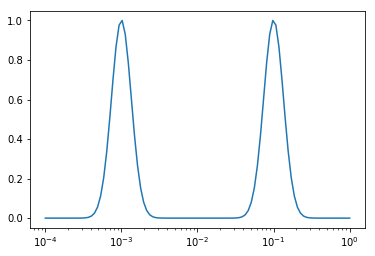

In [38]:
mg = [[1e-3,0.3,1],[1e-1,0.3,1]] #[tc, dt, amp]
sim = lp.MultiGauss(mg)
sim.genData(1e-4,1e0,100) #[Xi, Xf, N]
#sim.plotData()

plt.plot(sim.X,sim.Y)
#plt.xlabel('inverse time [s]')
#plt.ylabel('amplitude')
plt.xscale('log')
#plt.grid(True)
#plt.legend(['Dist. Simulada'],loc=9)
plt.savefig('Tabela_PI_100pt.png',dpi=300)
#plt.show()

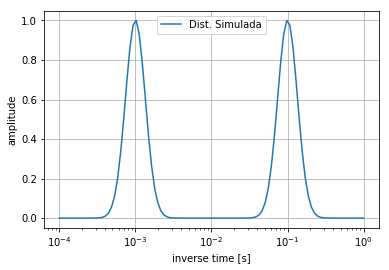

In [5]:
mg = [[1e-3,0.3,1],[1e-1,0.3,1]] #[tc, dt, amp]
sim = lp.MultiGauss(mg)
sim.genData(1e-4,1e0,100) #[Xi, Xf, N]
#sim.plotData()

plt.plot(sim.X,sim.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada'],loc=9)
plt.savefig('Sim_Dist_PI_100pt.png',dpi=300)

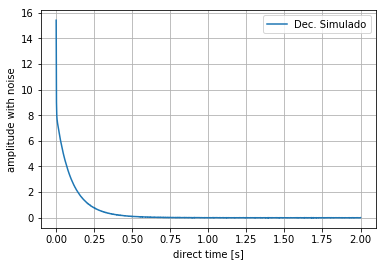

In [6]:
# SNR = 100.000

sig1 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig1.genX(1e-4,2,2000) #xi, xf, N
sig1.genY()
sig1.addGaussNoise(1e5)
#sig1.plotData()

plt.plot(sig1.x,sig1.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e5_PI_100pt.png',dpi=300)

In [7]:
reg1 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg1.genX(1e-4,1e0,100) #Xi, Xf, N

Opt1 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg1)
print Opt1

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.8798258601370178, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.878154594113905, 1e-08, 1e-08, 8.362510309503733e-08]
Última otimização do ajuste grosso:  [0.3235405092343678, 1e-08, 1e-08, 6.993157867655623e-07]
Última otimização do ajuste grosso:  [0.15736907778267883, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.04217966713700967, 1e-08, 1e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.026189937662815254, 1e-08, 1e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.023301282431537118, 1e-08, 1e-08, 0.00341995189335339]
Última otimização do ajuste grosso:  [0.02270246774897799, 1e-08, 4.8904256961953734e-05, 1e-08]
Última otimização do ajuste grosso:  [0.020780166813442053, 1e-08, 4.8904256961953734e-05, 0.0004089623530229578]
Laço  8.3625103095e-08  da varredura em Ns.
Laço  6.99315786766e-07  da varredura em Ns.
Laço  5.848035

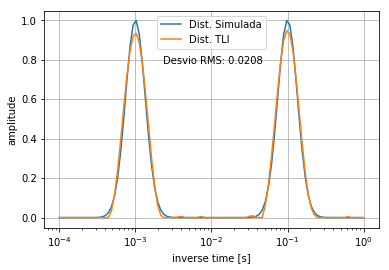

In [8]:
reg1 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg1.genX(1e-4,1e0,100) #Xi, Xf, N
reg1.genY([1e-08, 4.8904256961953734e-05, 0.0004089623530229578], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg1.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg1.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg1.X,reg1.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=9)
plt.text(2.3e-3,0.78,'Desvio RMS: 0.0208')
plt.savefig('Sim_Comp_1e5_PI_100pt.png',dpi=300)

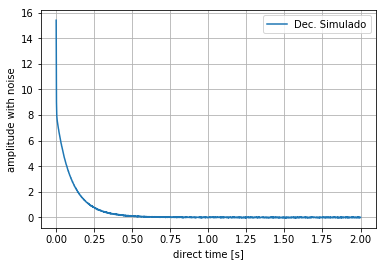

In [9]:
# SNR = 10.000

sig2 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig2.genX(1e-4,2,2000) #xi, xf, N
sig2.genY()
sig2.addGaussNoise(1e4)
#sig2.plotData()

plt.plot(sig2.x,sig2.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e4_PI_100pt.png',dpi=300)

In [10]:
reg2 = lp.InvLaplace(sig2, 0) #0=cpmg/1=invrec
reg2.genX(1e-4,1e0,100) #Xi, Xf, N

Opt2 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg2)
print Opt2

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.8836178072423944, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.8378399733225684, 1e-08, 1e-08, 8.362510309503733e-08]
Última otimização do ajuste grosso:  [0.45256707250162, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.19865575269306326, 1e-08, 1e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.08071539074592875, 1e-08, 1e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.030025845183068632, 1e-08, 1e-08, 0.00341995189335339]
Última otimização do ajuste grosso:  [0.020177285740106455, 1e-08, 1e-08, 0.028599382966174536]
Laço  8.3625103095e-08  da varredura em Ns.
Laço  6.99315786766e-07  da varredura em Ns.
Laço  5.84803547643e-06  da varredura em Ns.
Laço  4.8904256962e-05  da varredura em Ns.
Laço  0.000408962353023  da varredura em Ns.
Laço  0.00341995189335  da varredura em Ns.
Laço  0.0285993829662  da varredura em Ns.
Laço  

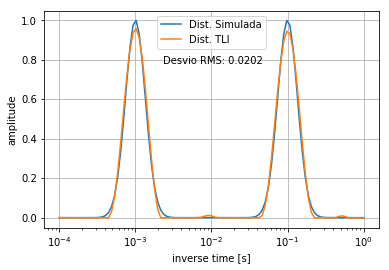

In [11]:
reg2 = lp.InvLaplace(sig2, 0) #0=cpmg/1=invrec
reg2.genX(1e-4,1e0,100) #Xi, Xf, N
reg2.genY([1e-08, 1e-08, 0.028599382966174536], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg2.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg2.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg2.X,reg2.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=9)
plt.text(2.3e-3,0.78,'Desvio RMS: 0.0202')
plt.savefig('Sim_Comp_1e4_PI_100pt.png',dpi=300)

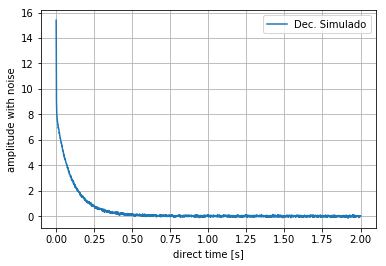

In [12]:
# SNR = 1.000

sig3 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig3.genX(1e-4,2,2000) #xi, xf, N
sig3.genY()
sig3.addGaussNoise(1e3)
#sig3.plotData()

plt.plot(sig3.x,sig3.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e3_PI_100pt.png',dpi=300)

In [13]:
reg3 = lp.InvLaplace(sig3, 0) #0=cpmg/1=invrec
reg3.genX(1e-4,1e0,100) #Xi, Xf, N

Opt3 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg3)
print Opt3

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.839396447450125, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.7235379064882239, 1e-08, 1e-08, 6.993157867655623e-07]
Última otimização do ajuste grosso:  [0.3901617973893016, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.27239096583218186, 1e-08, 1e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.2304144513493183, 1e-08, 1e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.09221746940437761, 1e-08, 1e-08, 0.00341995189335339]
Última otimização do ajuste grosso:  [0.04065657079461667, 1e-08, 1e-08, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.04056958838364537, 1e-08, 0.0004089623530229578, 0.028599382966174536]
Laço  8.3625103095e-08  da varredura em Ns.
Laço  6.99315786766e-07  da varredura em Ns.
Laço  5.84803547643e-06  da varredura em Ns.
Laço  4.8904256962e-05  da varredura em Ns.
Laço  0.000408962353023  da v

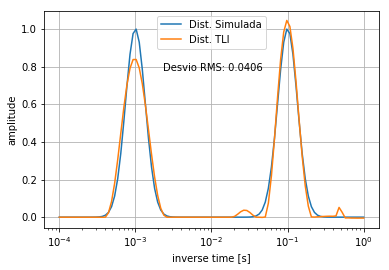

In [14]:
reg3 = lp.InvLaplace(sig3, 0) #0=cpmg/1=invrec
reg3.genX(1e-4,1e0,100) #Xi, Xf, N
reg3.genY([1e-08, 0.0004089623530229578, 0.028599382966174536], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg3.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg3.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg3.X,reg3.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=9)
plt.text(2.3e-3,0.78,'Desvio RMS: 0.0406')
plt.savefig('Sim_Comp_1e3_PI_100pt.png',dpi=300)

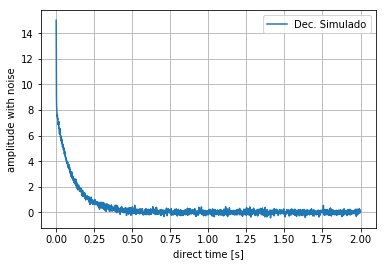

In [15]:
# SNR = 100

sig4 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig4.genX(1e-4,2,2000) #xi, xf, N
sig4.genY()
sig4.addGaussNoise(1e2)
#sig4.plotData()

plt.plot(sig4.x,sig4.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e2_PI_100pt.png',dpi=300)

In [16]:
reg4 = lp.InvLaplace(sig4, 0) #0=cpmg/1=invrec
reg4.genX(1e-4,1e0,100) #Xi, Xf, N

Opt4 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg4)
print Opt4

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.918114302133733, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.8957042143637959, 1e-08, 1e-08, 8.362510309503733e-08]
Última otimização do ajuste grosso:  [0.6673370622426725, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.37075969833474176, 1e-08, 1e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.27156285016648873, 1e-08, 1e-08, 0.00341995189335339]
Última otimização do ajuste grosso:  [0.10402912721472067, 1e-08, 1e-08, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.053269213640209936, 1e-08, 1e-08, 0.23916263490008]
Última otimização do ajuste grosso:  [0.05326921258591343, 1e-08, 8.362510309503733e-08, 0.23916263490008]
Última otimização do ajuste grosso:  [0.0532692039419977, 1e-08, 6.993157867655623e-07, 0.23916263490008]
Última otimização do ajuste grosso:  [0.05326913179248273, 1e-08, 5.848035476425729e-06, 0.23916263490008]
La

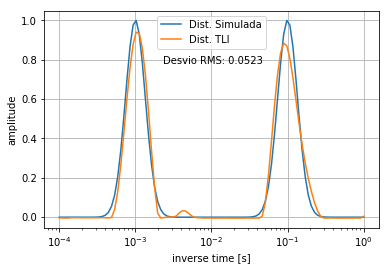

In [17]:
reg4 = lp.InvLaplace(sig4, 0) #0=cpmg/1=invrec
reg4.genX(1e-4,1e0,100) #Xi, Xf, N
reg4.genY([1e-08, 5.848035476425729e-06, 0.30281346398426073], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg4.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg4.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg4.X,reg4.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=9)
plt.text(2.3e-3,0.78,'Desvio RMS: 0.0523')
plt.savefig('Sim_Comp_1e2_PI_100pt.png',dpi=300)

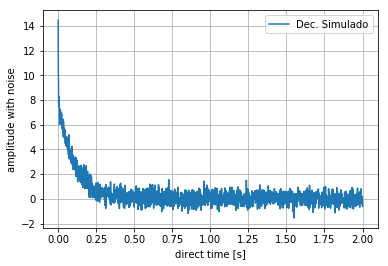

In [18]:
# SNR = 10

sig5 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig5.genX(1e-4,2,2000) #xi, xf, N
sig5.genY()
sig5.addGaussNoise(10)
#sig5.plotData()

plt.plot(sig5.x,sig5.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e1_PI_100pt.png',dpi=300)

In [33]:
reg5 = lp.InvLaplace(sig5, 0) #0=cpmg/1=invrec
reg5.genX(1e-4,1e0,100) #Xi, Xf, N

Opt5 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,500,10,reg5)
print Opt5

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.9370661861371486, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.9277475039532437, 1e-08, 1e-08, 1.5444521049463788e-07]
Última otimização do ajuste grosso:  [0.812355307586368, 1e-08, 1e-08, 2.3853323044733e-06]
Última otimização do ajuste grosso:  [0.6943064501079127, 1e-08, 1e-08, 0.0005689810202763905]
Última otimização do ajuste grosso:  [0.4038163899388411, 1e-08, 1e-08, 0.008787639344404095]
Última otimização do ajuste grosso:  [0.35982777924686227, 1e-08, 1e-08, 0.1357208808297452]
Última otimização do ajuste grosso:  [0.25533948244454957, 1e-08, 1e-08, 2.0961440008267664]
Última otimização do ajuste grosso:  [0.1481797066968692, 1e-08, 1e-08, 32.37394014347623]
Última otimização do ajuste grosso:  [0.14817970658369703, 1e-08, 8.362510309503733e-08, 32.37394014347623]
Última otimização do ajuste grosso:  [0.14817970561989352, 1e-08, 6.993157867655623e-07, 32.37394014347623]
Última otimização 

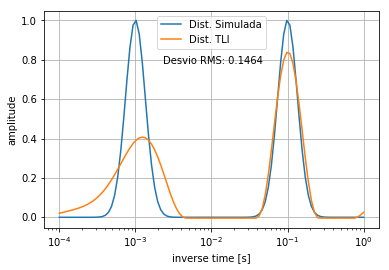

In [35]:
reg5 = lp.InvLaplace(sig5, 0) #0=cpmg/1=invrec
reg5.genX(1e-4,1e0,100) #Xi, Xf, N
reg5.genY([1e-08, 0.028599382966174536, 43.881514571549914], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg5.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg5.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg5.X,reg5.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=9)
plt.text(2.3e-3,0.78,'Desvio RMS: 0.1464')
plt.savefig('Sim_Comp_1e1_PI_100pt.png',dpi=300)